In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
Dataset = pd.read_csv('Position_Salaries.csv')
X = Dataset.iloc[:,1:-1].values
Y = Dataset.iloc[:,-1].values

In [68]:
X.shape

(10, 1)

In [69]:
Y.shape

(10,)

In [165]:
X = X[:7,:]
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [166]:
Y = Y[:7]
Y

array([ 45000,  50000,  60000,  80000, 110000, 150000, 200000])

In [221]:
class PolynomailRegression() :

    def __init__( self, degree, learning_rate, iterations ) : 
        self.degree = degree
        self.learning_rate = learning_rate        
        self.iterations = iterations
         

     
    def transform( self, X ) :
        
        X_poly = np.ones( ( self.m, 1 ) )
        for j in range( self.degree + 1 ) :
             
            if j != 0 : 
                x_new = np.power( X, j )
                X_poly = np.append( X_poly, x_new.reshape( -1, 1 ), axis = 1 )
 
        return X_poly  
     

     
    def normalize( self, X ) :
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X

     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        self.W = np.zeros( self.degree + 1 )
         
        X_transform = self.transform( self.X )        
        m = Y.shape[0]
        X_normalize = self.normalize( X_transform )
        costs = []
        for i in range( self.iterations ) : 
            h = self.predict( self.X )
            error = (h-self.Y)**3
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
         
        return self
     

     
    def predict( self, X ) :
        X_poly = self.transform(X)
        X_poly = self.normalize(X_poly)
        return np.dot( X_poly, self.W )

In [222]:
 model = PolynomailRegression( degree = 2, learning_rate = 0.00000000001, iterations = 50000)
 model.fit( X, Y )

In [223]:
Y_pred = model.predict( X )

In [224]:
model.W

array([99648.23468317, -2200.00571379, 55213.25810131])

In [225]:
Y_pred

array([ 38867.19915214,  47885.25589025,  63648.6856917 ,  86157.48855649,
       115411.66448463, 151411.21347609, 194156.1355309 ])

In [226]:
Y

array([ 45000,  50000,  60000,  80000, 110000, 150000, 200000])

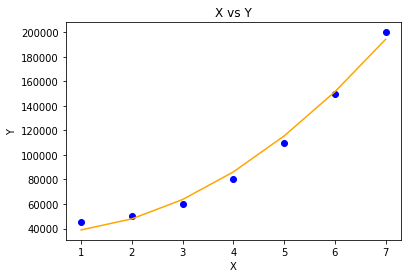

In [227]:
plt.scatter( X, Y, color = 'blue' )
     
plt.plot( X, Y_pred, color = 'orange' )
     
plt.title( 'X vs Y' )
     
plt.xlabel( 'X' )
     
plt.ylabel( 'Y' )
     
plt.show()